# Importing Libraries.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import time
import matplotlib.patheffects as PathEffects
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
np.random.seed(0)

In [2]:
def loadDataset(path):
    print('Loading Dataset...')
    train_x, train_y, test_x, test_y = [], [], [], []
    for i in range(10):
        for filename in glob.glob(path + '\\train\\' + str(i)+'\\*.png'):
            im=cv2.imread(filename)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            train_x.append(im)
            train_y.append(i)
    for i in range(10):
        for filename in glob.glob(path + '\\test\\' + str(i)+'\\*.png'):
            im=cv2.imread(filename)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            test_x.append(im)
            test_y.append(i)
    print('Dataset loaded...')
    return np.array(train_x), np.array(train_y), np.array(test_x),np.array(test_y)

# Data Loading

In [3]:
train_set_x1, train_set_y1, test_set_x1, test_set_y1  = loadDataset('C:/Users/Mudasser Afzal/Desktop/Mudasser_MSDS19067_02')

Loading Dataset...
Dataset loaded...


In [4]:
train_set_x, train_set_y, test_set_x, test_set_y = train_set_x1, train_set_y1, test_set_x1, test_set_y1

In [5]:
print("train_x shape:", train_set_x.shape)
print("train_y shape:", train_set_y.shape)
print("test_x shape:", test_set_x.shape)
print("test_y shape:", test_set_y.shape)

train_x shape: (60000, 28, 28)
train_y shape: (60000,)
test_x shape: (10000, 28, 28)
test_y shape: (10000,)


In [6]:
train_set_x, train_set_y = shuffle(train_set_x, train_set_y)

# reshape and Flattening Data

In [7]:
train_set_y = np.expand_dims(train_set_y, axis = 1)
test_set_y = np.expand_dims(test_set_y, axis=1)
train_set_x = train_set_x.flatten().reshape(train_set_x.shape[0],(train_set_x.shape[1] * train_set_x.shape[2]))
test_set_x = test_set_x.flatten().reshape(test_set_x.shape[0],(test_set_x.shape[1] * test_set_x.shape[2]))

In [8]:
print("train_x shape:", train_set_x.shape)
print("train_y shape:", train_set_y.shape)
print("test_x shape:", test_set_x.shape)
print("test_y shape:", test_set_y.shape)

train_x shape: (60000, 784)
train_y shape: (60000, 1)
test_x shape: (10000, 784)
test_y shape: (10000, 1)


# Mean subtraction and normalization

In [9]:
train_set_x = (train_set_x - int(np.mean(train_set_x))) / 255
test_set_x = (test_set_x - int(np.mean(test_set_x))) / 255

# Data Splitting

In [10]:
trainX = train_set_x[:50000]
trainY = train_set_y[:50000]
validX = train_set_x[50000:]
validY = train_set_y[50000:]

# Encoding of labels

In [11]:
def encoder(Y):
    c = np.arange(10)
    encoding = (c == Y).astype(np.int)
    return encoding

In [12]:
encoded_train = encoder(trainY)
encoded_valid = encoder(validY)
test_set_y = encoder(test_set_y)

In [13]:
print("train_x shape:", trainX.shape)
print("train_y shape:", encoded_train.shape)
print("validation_x shape:", validX.shape)
print("valid_ y shape:", encoded_valid.shape)
print("testing data shape", test_set_y.shape)

train_x shape: (50000, 784)
train_y shape: (50000, 10)
validation_x shape: (10000, 784)
valid_ y shape: (10000, 10)
testing data shape (10000, 10)


# TSNE PLOT

In [14]:
def PlotTsne():
    import pandas as pd
    feat_cols = [ 'pixel'+str(i) for i in range(train_set_x.shape[1]) ]
    df = pd.DataFrame(train_set_x,columns=feat_cols)
    df['y'] = train_set_y
    df['label'] = df['y'].apply(lambda i: str(i))
    X, y = None, None
    print('Size of the dataframe: {}'.format(df.shape))
    np.random.seed(42)
    rndperm = np.random.permutation(df.shape[0])
    N = 10000
    df_subset = df.loc[rndperm[:N],:].copy()
    data_subset = df_subset[feat_cols].values
    # PCA for reducing Dimensions
    pca_50 = PCA(n_components=50)
    pca_result_50 = pca_50.fit_transform(data_subset)
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
    tsne_results = tsne.fit_transform(pca_result_50)
    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 10),
        data=df_subset,
        legend="full",
        alpha=0.3
    )

In [ ]:
PlotTsne()

# Neural network architecture

In [15]:
class Neural_Network(object):
    
    def __init__(self, neurons_per_layer, no_of_layers = 2, inputSize = 784):        
        # size of layers
        self.inputSize = inputSize
        self.hidden1 = neurons_per_layer[0]
        self.hidden2 = neurons_per_layer[1]
        self.outputSize = neurons_per_layer[2] 
        #weights
        self.model = {}
        w1 = np.random.randn(self.inputSize, self.hidden1) #784x128
        b1 = np.random.randn(1,self.hidden1)
        w2 = np.random.randn(self.hidden1, self.hidden2)   #128x64
        b2 = np.random.randn(1,self.hidden2)
        w3 = np.random.randn(self.hidden2, self.outputSize) #64x10
        b3 = np.random.randn(1,self.outputSize)
        print('Network Architecture weights',w1.shape, w2.shape, w3.shape)
        print('Network Architecture biases',b1.shape, b2.shape, b3.shape)
        self.model['w1'] = w1
        self.model['b1'] = b1
        self.model['w2'] = w2
        self.model['b2'] = b2
        self.model['w3'] = w3
        self.model['b3'] = b3
        
        
    def sigmoid(self, s):
        activated_output = 1 / (1 + (np.exp(-s)))
        return activated_output

    def sigmoid_derivative(self, s):
        return s * (1 - s)

    def softmax(self, s):
        e = np.exp(s - np.max(s))
        return e/ np.sum(e, axis=1, keepdims=True)

    def softmax_derivative(self, s):
        z = self.softmax(s)
        D = -np.outer(z, z) + np.diag(z.flatten())
        return D
    
    def feedforward(self, X):
        forward_result = {}
        
        w1, b1, w2, b2, w3, b3 = self.model['w1'], self.model['b1'], self.model['w2'], self.model['b2'], self.model['w3'], self.model['b3']
        
        z1 = X.dot(w1) + b1
        a1 = self.sigmoid(z1)
       
        z2 = a1.dot(w2) + b2
        a2 = self.sigmoid(z2)
    
        z3 = a2.dot(w3) + b3
        a3 = self.softmax(z3)

        forward_result['z1'] = z1
        forward_result['a1'] = a1
        forward_result['z2'] = z2
        forward_result['a2'] = a2
        forward_result['z3'] = z3
        forward_result['a3'] = a3
        
        return forward_result
    
    def back_propagation(self, X, Y, forward_result, lr):
        
        w1, b1, w2, b2, w3, b3 = self.model['w1'],self.model['b1'], self.model['w2'],self.model['b2'], \
        self.model['w3'],self.model['b3']
        
        gradient = {}
    
        a1, a2, a3 = forward_result['a1'], forward_result['a2'], forward_result['a3']
    
        m = X.shape[0]
        
        delta_out = a3 - Y
        delta_w3 = 1/m * np.dot(a2.T, delta_out)
        delta_b3 = 1/m * np.sum(delta_out, axis=0, keepdims = True)
        
        delta_h2 = np.multiply(np.dot(delta_out, w3.T) , self.sigmoid_derivative(a2))
        delta_w2 = 1/m * np.dot(a1.T, delta_h2)
        delta_b2 = 1/m * np.sum(delta_h2, axis=0, keepdims = True)
        

        delta_h1 = np.multiply(np.dot(delta_h2, w2.T) , self.sigmoid_derivative(a1))
        delta_w1 = 1/m * np.dot(X.T, delta_h1)
        delta_b1 = 1/m * np.sum(delta_h1, axis=0, keepdims = True)
        
        gradient['dw1'] = delta_w1
        gradient['db1'] = delta_b1
        gradient['dw2'] = delta_w2
        gradient['db2'] = delta_b2
        gradient['dw3'] = delta_w3
        gradient['db3'] = delta_b3   
        return gradient
    
       
    def weight_update(self, model, gradient, lr):
    
#         delta_w1, delta_b1, delta_w2, delta_b2, delta_w3, delta_b3 = gradient['dw1'], gradient['db1'],gradient['dw2'], \
#         gradient['db2'], gradient['dw3'], gradient['db3']
        
 ###################### weight Updating here #####################
        
        self.model['w1'] = self.model['w1'] - (lr * gradient['dw1'])
        self.model['b1'] = self.model['b1'] - (lr * gradient['db1'])
        self.model['w2'] = self.model['w2'] - (lr * gradient['dw2'])
        self.model['b2'] = self.model['b2'] - (lr * gradient['db2'])
        self.model['w3'] = self.model['w3'] - (lr * gradient['dw3'])
        self.model['b3'] = self.model['b3'] - (lr * gradient['db3'])
            
    def crossentropy(self, Y, Y_pred):
        return (-np.sum(Y * np.log2(Y_pred+1e-12))) / len(Y)
    
    def batch_gradient(self, batch_size, trainX, trainY, learningRate):
        for j in range(0, trainX.shape[0], batch_size):
            X = trainX[j:j+batch_size]
            Y = trainY[j:j+batch_size]
            forward_result = self.feedforward(X)
            gradient = self.back_propagation(X, Y, forward_result, learningRate)
            self.weight_update(self.model, gradient, learningRate)

    def train(self, trainX, trainY, batch_size, epochs, learningRate,validationX = 'None', validationY = 'None'):

        train_error = []
        valid_error = []
        valid_accu = []
        train_accu = []
        
        for i in range(epochs):
            
            self.batch_gradient(batch_size, trainX, trainY, learningRate)
            
            train_pred = self.feedforward(trainX)
            
            entropy = self.crossentropy(trainY, train_pred['a3'])
            
            train_error.append(entropy)

            val_pred = self.feedforward(validationX)
            err = self.crossentropy(validationY, val_pred['a3'])
            valid_error.append(err)
                
                            
            taccu = self.accuracy(trainX, trainY)
            
            train_accu.append(taccu)

            accu= self.accuracy(validationX, validationY)
            valid_accu.append(accu)
            
            print ("epoch:",i, "training Loss:" ,entropy, "validation Loss:" ,err, \
                      "train accuracy", taccu, "valid accuracy", accu)
            
        self.curve_plot(epochs, train_error, valid_error, train_accu, valid_accu)
        
    def curve_plot(self, epochs, train_error, valid_error, train_accu, valid_accu):
        
        plt.legend(loc='best')
        plt.title("loss curve")
        plt.plot(range(epochs), train_error)
        plt.plot(range(epochs), valid_error)
        plt.show()
        plt.legend(loc='best')
        plt.title("accuracy Curve")
        plt.plot(range(epochs), train_accu)
        plt.plot(range(epochs), valid_accu)
        plt.show()

        
        
    def predict(self, X):
        forward_result = self.feedforward(X)
        return forward_result['a3']
    
    def accuracy(self, X, Y):
    
        test_pred = self.predict(X)
        pred = np.argmax(test_pred, axis=1)
        y = np.argmax(Y, axis=1)        
        accuracy = (pred == y)
        accuracy = np.mean(accuracy)
        return accuracy * 100
        
    def saveModel(self, name):
        np.savez(name, self.model['w1'],self.model['b1'],self.model['w2'],\
                 self.model['b2'],self.model['w3'],self.model['b3'], allow_pickle=True)
        
    def loadModel(self,name):
        file = np.load(name, allow_pickle=True)
        self.model['w1'] = file['arr_0']
        self.model['b1'] = file['arr_1']
        self.model['w2'] = file['arr_2']
        self.model['b2'] = file['arr_3']
        self.model['w3'] = file['arr_4']
        self.model['b3'] = file['arr_5']

Network Architecture weights (784, 128) (128, 128) (128, 10)
Network Architecture biases (1, 128) (1, 128) (1, 10)
epoch: 0 training Loss: 3.151589644142922 validation Loss: 3.1387645588766206 train accuracy 21.794 valid accuracy 22.23
epoch: 1 training Loss: 3.0290382836241636 validation Loss: 3.02478169830588 train accuracy 25.946 valid accuracy 26.240000000000002
epoch: 2 training Loss: 2.8899233193496188 validation Loss: 2.882783425152339 train accuracy 29.609999999999996 valid accuracy 29.86
epoch: 3 training Loss: 2.7643853573519084 validation Loss: 2.7592313341565067 train accuracy 32.300000000000004 valid accuracy 32.24
epoch: 4 training Loss: 2.646506182985515 validation Loss: 2.645837208697666 train accuracy 35.164 valid accuracy 34.88
epoch: 5 training Loss: 2.5431278564559348 validation Loss: 2.5446401055006382 train accuracy 37.66 valid accuracy 37.24
epoch: 6 training Loss: 2.4610869860978033 validation Loss: 2.465432756764934 train accuracy 39.534000000000006 valid accur

epoch: 63 training Loss: 1.196336372977023 validation Loss: 1.300004601347092 train accuracy 71.814 valid accuracy 69.72
epoch: 64 training Loss: 1.1893724276104454 validation Loss: 1.2942118369834636 train accuracy 71.968 valid accuracy 69.88
epoch: 65 training Loss: 1.182573768380984 validation Loss: 1.2885690556208031 train accuracy 72.15599999999999 valid accuracy 70.03
epoch: 66 training Loss: 1.1759370876948363 validation Loss: 1.2830728724746685 train accuracy 72.312 valid accuracy 70.19
epoch: 67 training Loss: 1.1694589461498643 validation Loss: 1.2777195817070983 train accuracy 72.49799999999999 valid accuracy 70.36
epoch: 68 training Loss: 1.1631355539863022 validation Loss: 1.2725050561474047 train accuracy 72.67 valid accuracy 70.54
epoch: 69 training Loss: 1.1569625401443453 validation Loss: 1.2674246674073677 train accuracy 72.844 valid accuracy 70.6
epoch: 70 training Loss: 1.1509348191223931 validation Loss: 1.2624732739821953 train accuracy 72.974 valid accuracy 70.71

No handles with labels found to put in legend.


epoch: 99 training Loss: 1.0160077930881226 validation Loss: 1.1539617413967806 train accuracy 76.536 valid accuracy 73.76


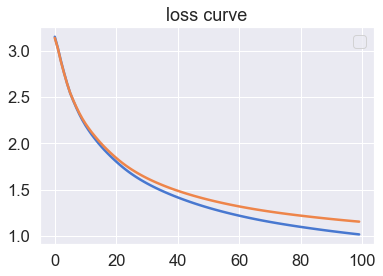

No handles with labels found to put in legend.


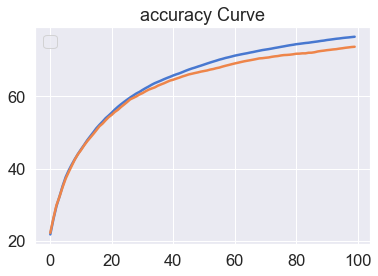

In [16]:
nn = Neural_Network([128,128,10])
nn.train(trainX, encoded_train, batch_size = 128, epochs = 100, 
         learningRate = 0.1, validationX = validX, validationY = encoded_valid)

In [17]:
nn.saveModel("BestModelTask3")

In [18]:
nn.loadModel('BestModelTask3.npz')
nn.accuracy(test_set_x,test_set_y)

75.03

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = nn.predict(test_set_x)
p = np.argmax(y_pred, axis=1)
y = np.argmax(test_set_y, axis=1)
confusion_matrix(y, p)

array([[ 774,    0,   37,   36,   20,   20,   16,    4,   70,    3],
       [   0, 1065,   28,   13,    4,    4,    6,    3,   12,    0],
       [  20,    7,  840,   50,   20,    1,   40,    9,   43,    2],
       [  17,   14,  127,  694,   12,   34,    4,   25,   67,   16],
       [  12,    3,   14,   10,  780,    9,   23,   25,   23,   83],
       [  23,   15,   27,  164,   53,  426,   29,   10,  131,   14],
       [  18,    8,   59,    9,   34,   13,  805,    0,   12,    0],
       [   1,   12,   25,   17,   48,    5,    1,  835,   12,   72],
       [  44,   11,   57,   74,   38,   31,    7,   14,  683,   15],
       [   5,    5,    9,   15,  252,    2,    3,   89,   28,  601]],
      dtype=int64)